In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Unnamed: 0                           1470 non-null int64
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
del df['Unnamed: 0']

In [5]:
df.shape

(1470, 51)

### Breaking Data into 70% Training and 30% Testing

In [89]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75)
train, val = sklearn.cross_validation.train_test_split(train, train_size = 0.75)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 826
For Validation Set : 276
For Test Set : 368


In [90]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
X_train = scaler.transform(x_train)

# Scale the train set
X_val = scaler.transform(x_val)

# Scale the test set
X_test = scaler.transform(x_test)

In [113]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(32,kernel_initializer='uniform', activation='relu', input_shape=(50,)))

model.add(Dense(8,kernel_initializer='uniform', activation='relu'))

# Add an output layer 
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

In [114]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=32, verbose=1,validation_data=(X_val,y_val))

Train on 826 samples, validate on 276 samples
Epoch 1/20
826/826 [==============================] - 1s 966us/step - loss: 0.6871 - acc: 0.8196 - val_loss: 0.6766 - val_acc: 0.8587
Epoch 2/20
826/826 [==============================] - 0s 64us/step - loss: 0.6620 - acc: 0.8305 - val_loss: 0.6328 - val_acc: 0.8587
Epoch 3/20
826/826 [==============================] - 0s 65us/step - loss: 0.5925 - acc: 0.8305 - val_loss: 0.5310 - val_acc: 0.8587
Epoch 4/20
826/826 [==============================] - 0s 62us/step - loss: 0.4804 - acc: 0.8305 - val_loss: 0.4251 - val_acc: 0.8587
Epoch 5/20
826/826 [==============================] - 0s 61us/step - loss: 0.4074 - acc: 0.8305 - val_loss: 0.3735 - val_acc: 0.8587
Epoch 6/20
826/826 [==============================] - 0s 62us/step - loss: 0.3763 - acc: 0.8305 - val_loss: 0.3560 - val_acc: 0.8587
Epoch 7/20
826/826 [==============================] - 0s 61us/step - loss: 0.3612 - acc: 0.8305 - val_loss: 0.3462 - val_acc: 0.8587
Epoch 8/20
826/826 [==

In [116]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

368/368 [==============================] - 0s 35us/step
[0.3382232480722925, 0.8614130434782609]


In [117]:
y_pred = model.predict(X_test)

In [118]:
y_pred[:5]

array([[0.14287381],
       [0.01980779],
       [0.44137233],
       [0.0004981 ],
       [0.0249689 ]], dtype=float32)

In [119]:
y_p=list()
for i in y_pred:
    if i>0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [120]:
y_test[:5]

819    0
587    0
571    0
557    0
472    0
Name: Attrition, dtype: int64

In [121]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_p)


array([[301,   9],
       [ 42,  16]], dtype=int64)

### End Evaluation Metrics

ROC AUC: 0.62


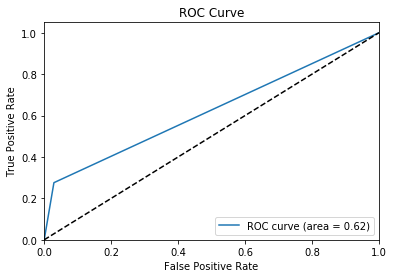

In [122]:
fpr, tpr, _ = roc_curve(y_test, y_p)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [123]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_p)

0.32108233251338436

In [124]:
# F1 score
f1_score(y_test,y_p)

0.3855421686746988